In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

In [3]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()

In [4]:
def standardize(x):
    return (x - mu) / sigma

In [5]:
train_z = standardize(train_x)

In [6]:
# パラメータを初期化
theta = np.random.rand(3)

In [7]:
# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

In [8]:
X = to_matrix(train_z)

In [9]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [10]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [11]:
# 学習率
ETA = 1e-3

In [12]:
# 誤差の差分
diff = 1

In [13]:
# 更新回数
count = 0

In [14]:
# 学習を繰り返す
error = MSE(X, train_y)
while diff > 1e-2:
    # 確率的勾配降下法でパラメータ更新
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p, :], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

    # 前回の誤差との差分を計算
    current_error = MSE(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [9.15854968 2.43318252 9.58429284], 差分 = 14946.9417
2回目: theta = [17.21575974  4.28747347 17.72791865], 差分 = 13450.8897
3回目: theta = [24.96088464  6.08602594 25.36930937], 差分 = 12149.9047
4回目: theta = [32.41289152  7.82900173 32.55559433], 差分 = 10997.8381
5回目: theta = [39.5753509   9.55784622 39.29873863], 差分 = 9952.1662
6回目: theta = [46.46693819 11.26540206 45.66190059], 差分 = 9038.3980
7回目: theta = [53.09660927 12.95243697 51.58208517], 差分 = 8163.3928
8回目: theta = [59.47167169 14.65103505 57.11950156], 差分 = 7401.8837
9回目: theta = [65.62497019 16.28235487 62.32524442], 差分 = 6733.0019
10回目: theta = [71.54715665 17.92356389 67.17209131], 差分 = 6108.5994
11回目: theta = [77.26237664 19.5194005  71.69418466], 差分 = 5553.9770
12回目: theta = [82.77830497 21.08286238 75.91874657], 差分 = 5059.7609
13回目: theta = [88.10561124 22.64549416 79.89487902], 差分 = 4632.5000
14回目: theta = [93.24621985 24.15808385 83.5521713 ], 差分 = 4205.2423
15回目: theta = [98.21610236 25.66116133 86.97459819], 差分 

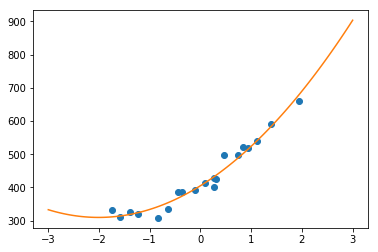

In [15]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()